## Кривая ROC — это отношение TPR к FPR
- (TPR) показывает, какой процент среди всех positive верно предсказан моделью;
- $TPR = TP / (TP + FN)$
- (FPR) показывает, какой процент среди всех negative неверно предсказан моделью.
- $FPR = FP / (FP + TN)$

In [2]:
!pip3 install redis

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com/
  Using cached redis-4.5.5-py3-none-any.whl (240 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)


In [1]:
import Common
import ModelResearcher as MR

In [3]:
df = MR.pd.read_json('../data/all_examples.json')
# df.head()

In [4]:
mr = MR.ModelResearcher()
mr.load('C:/Users/Andrey/Diploma_tasks/Diploma-NLP/NLP-microservice/models/w2v', "gensim")

True

In [5]:
df = mr.preprocess_and_save_pairs(df, 'text_rp', 'text_proj')

In [10]:
sim_w2v = mr.match_texts_from_corpus(df,  'w2v', 'gensim', 'preprocessed_text_rp', 'preprocessed_text_proj')

In [7]:
import numpy as np

def calc_tpr_fpr(sim, df, match_threshold):
    (TP, FP, FN, TN) = Common.get_states(sim, df, match_threshold)
    return {
       "tpr": round(float(TP / (TP + FN)), 3),
       "fpr": round(float(FP / (FP + TN)), 3)
    }

def max_diff_tpr_fpr(sim, df, step=0.02):
    score = 0
    scores = []
    diff_tpr_fpr = 0
    cutoff = 0
    h = step
    steps = np.linspace(0, 1, num=int(1/h)+1)
    steps = np.round(steps, 2)
    tprs = []
    fprs = []
    for i in steps:
        try:
            score = calc_tpr_fpr(sim, df, i)
            tprs.append(score["tpr"])
            fprs.append(score["fpr"])
            diff = round(float((score["tpr"] - score["fpr"])), 3)
            if  diff > diff_tpr_fpr:
                diff_tpr_fpr = diff
                cutoff = i
        except ZeroDivisionError:
            print('ZeroDiv')
            pass
    return steps, tprs, fprs, cutoff

In [14]:
sim_w2v = [0.803, 0.765, 0.714, 0.821, 0.802, 0.616, 0.738, 0.803, 0.859, 0.608, 0.892, 0.78, 0.9, 0.766, 0.598, 0.811, 0.908, 0.731, 0.583,
 0.825, 0.743, 0.854, 0.837, 0.813, 0.893, 0.705, 0.711, 0.442, 0.466, 0.769, 0.919, 0.835, 0.756, 0.866, 0.738, 0.319, 0.411, 0.189, 0.455, 0.062, 0.377, 0.303, 0.744, 0.73, 0.525, 0.483, 0.701, 0.679, 0.674, 0.781, 0.618, 0.859, 0.635, 0.698, 0.599, 0.658, 0.723, 0.406, 0.345, 0.212, 0.535, 0.717, 0.806, 0.461, 0.33, 0.659, 0.632, 0.613, 0.515, 0.575]

In [15]:
sim_ft = [0.865, 0.87, 0.783, 0.873, 0.842, 0.843, 0.835, 0.874, 0.887, 0.716, 0.914, 0.847, 0.939, 0.842, 0.65, 0.849, 0.95, 0.822, 0.769, 0.893, 0.747, 0.901, 0.914, 0.839, 0.919, 0.801, 0.865, 0.713, 0.711, 0.867, 0.931, 0.916, 0.833, 0.892, 0.876, 0.617, 0.678, 0.481, 0.645, 0.456, 0.684, 0.687, 0.613, 0.811, 0.69, 0.545, 0.846, 0.784, 0.822, 0.851, 0.764, 0.904, 0.779, 0.801, 0.744, 0.814, 0.806, 0.522, 0.669, 0.696, 0.732, 0.802, 0.872, 0.486, 0.645, 0.802, 0.797, 0.75, 0.673, 0.767]

In [18]:
sim_multilingual = [0.477, 0.383, 0.44, 0.554, 0.491, 0.537, 0.505, 0.618, 0.488, 0.484, 0.591, 0.429, 0.519, 0.374,
 0.507, 0.469, 0.52, 0.449, 0.539, 0.466, 0.472, 0.511, 0.482, 0.367, 0.445, 0.56, 0.467, 0.539, 
0.491, 0.579, 0.64, 0.583, 0.597, 0.688, 0.655, 0.344, 0.332, 0.231, 0.36, 0.31, 0.318, 0.337, 0.363, 0.391, 0.337, 0.369, 0.452, 0.299, 0.344, 0.42, 0.419, 0.38, 0.344, 0.417, 0.373, 0.409, 0.419, 0.236, 0.14, 0.234, 0.351, 0.461, 0.541, 0.288, 0.376, 0.394, 0.376, 0.25, 0.341, 0.359]

In [31]:
sim_deepPavlov = [0.53, 0.482, 0.599, 0.583, 0.515, 0.486, 0.549, 0.6, 0.569, 0.534, 0.704, 0.565, 0.616, 0.471, 0.605, 0.407, 0.606, 0.513, 0.594, 0.56, 0.548, 0.521, 0.493, 0.424, 0.482, 0.641, 0.679, 0.607, 0.503, 0.625, 0.775, 0.708, 0.721, 0.628, 0.527, 0.454, 0.454, 0.317, 0.468, 0.331, 0.374, 0.383, 
0.469, 0.546, 0.512, 0.482, 0.57, 0.393, 0.434, 0.514, 0.477, 0.524, 0.466, 0.552, 0.446, 0.427, 
0.529, 0.469, 0.495, 0.488, 0.534, 0.529, 0.632, 0.445, 0.525, 0.677, 0.598, 0.577, 0.547, 0.528]

In [32]:
steps, tprs_w2v, fprs_w2v, cutoff_w2v = max_diff_tpr_fpr(sim_w2v, df)
steps, tprs_ft, fprs_ft, cutoff_ft = max_diff_tpr_fpr(sim_ft, df)
steps, tprs_deepPavlov, fprs_deepPavlov, cutoff_deepPavlov = max_diff_tpr_fpr(sim_deepPavlov, df)
steps, tprs_multilingual, fprs_multilingual, cutoff_multilingual = max_diff_tpr_fpr(sim_multilingual, df)


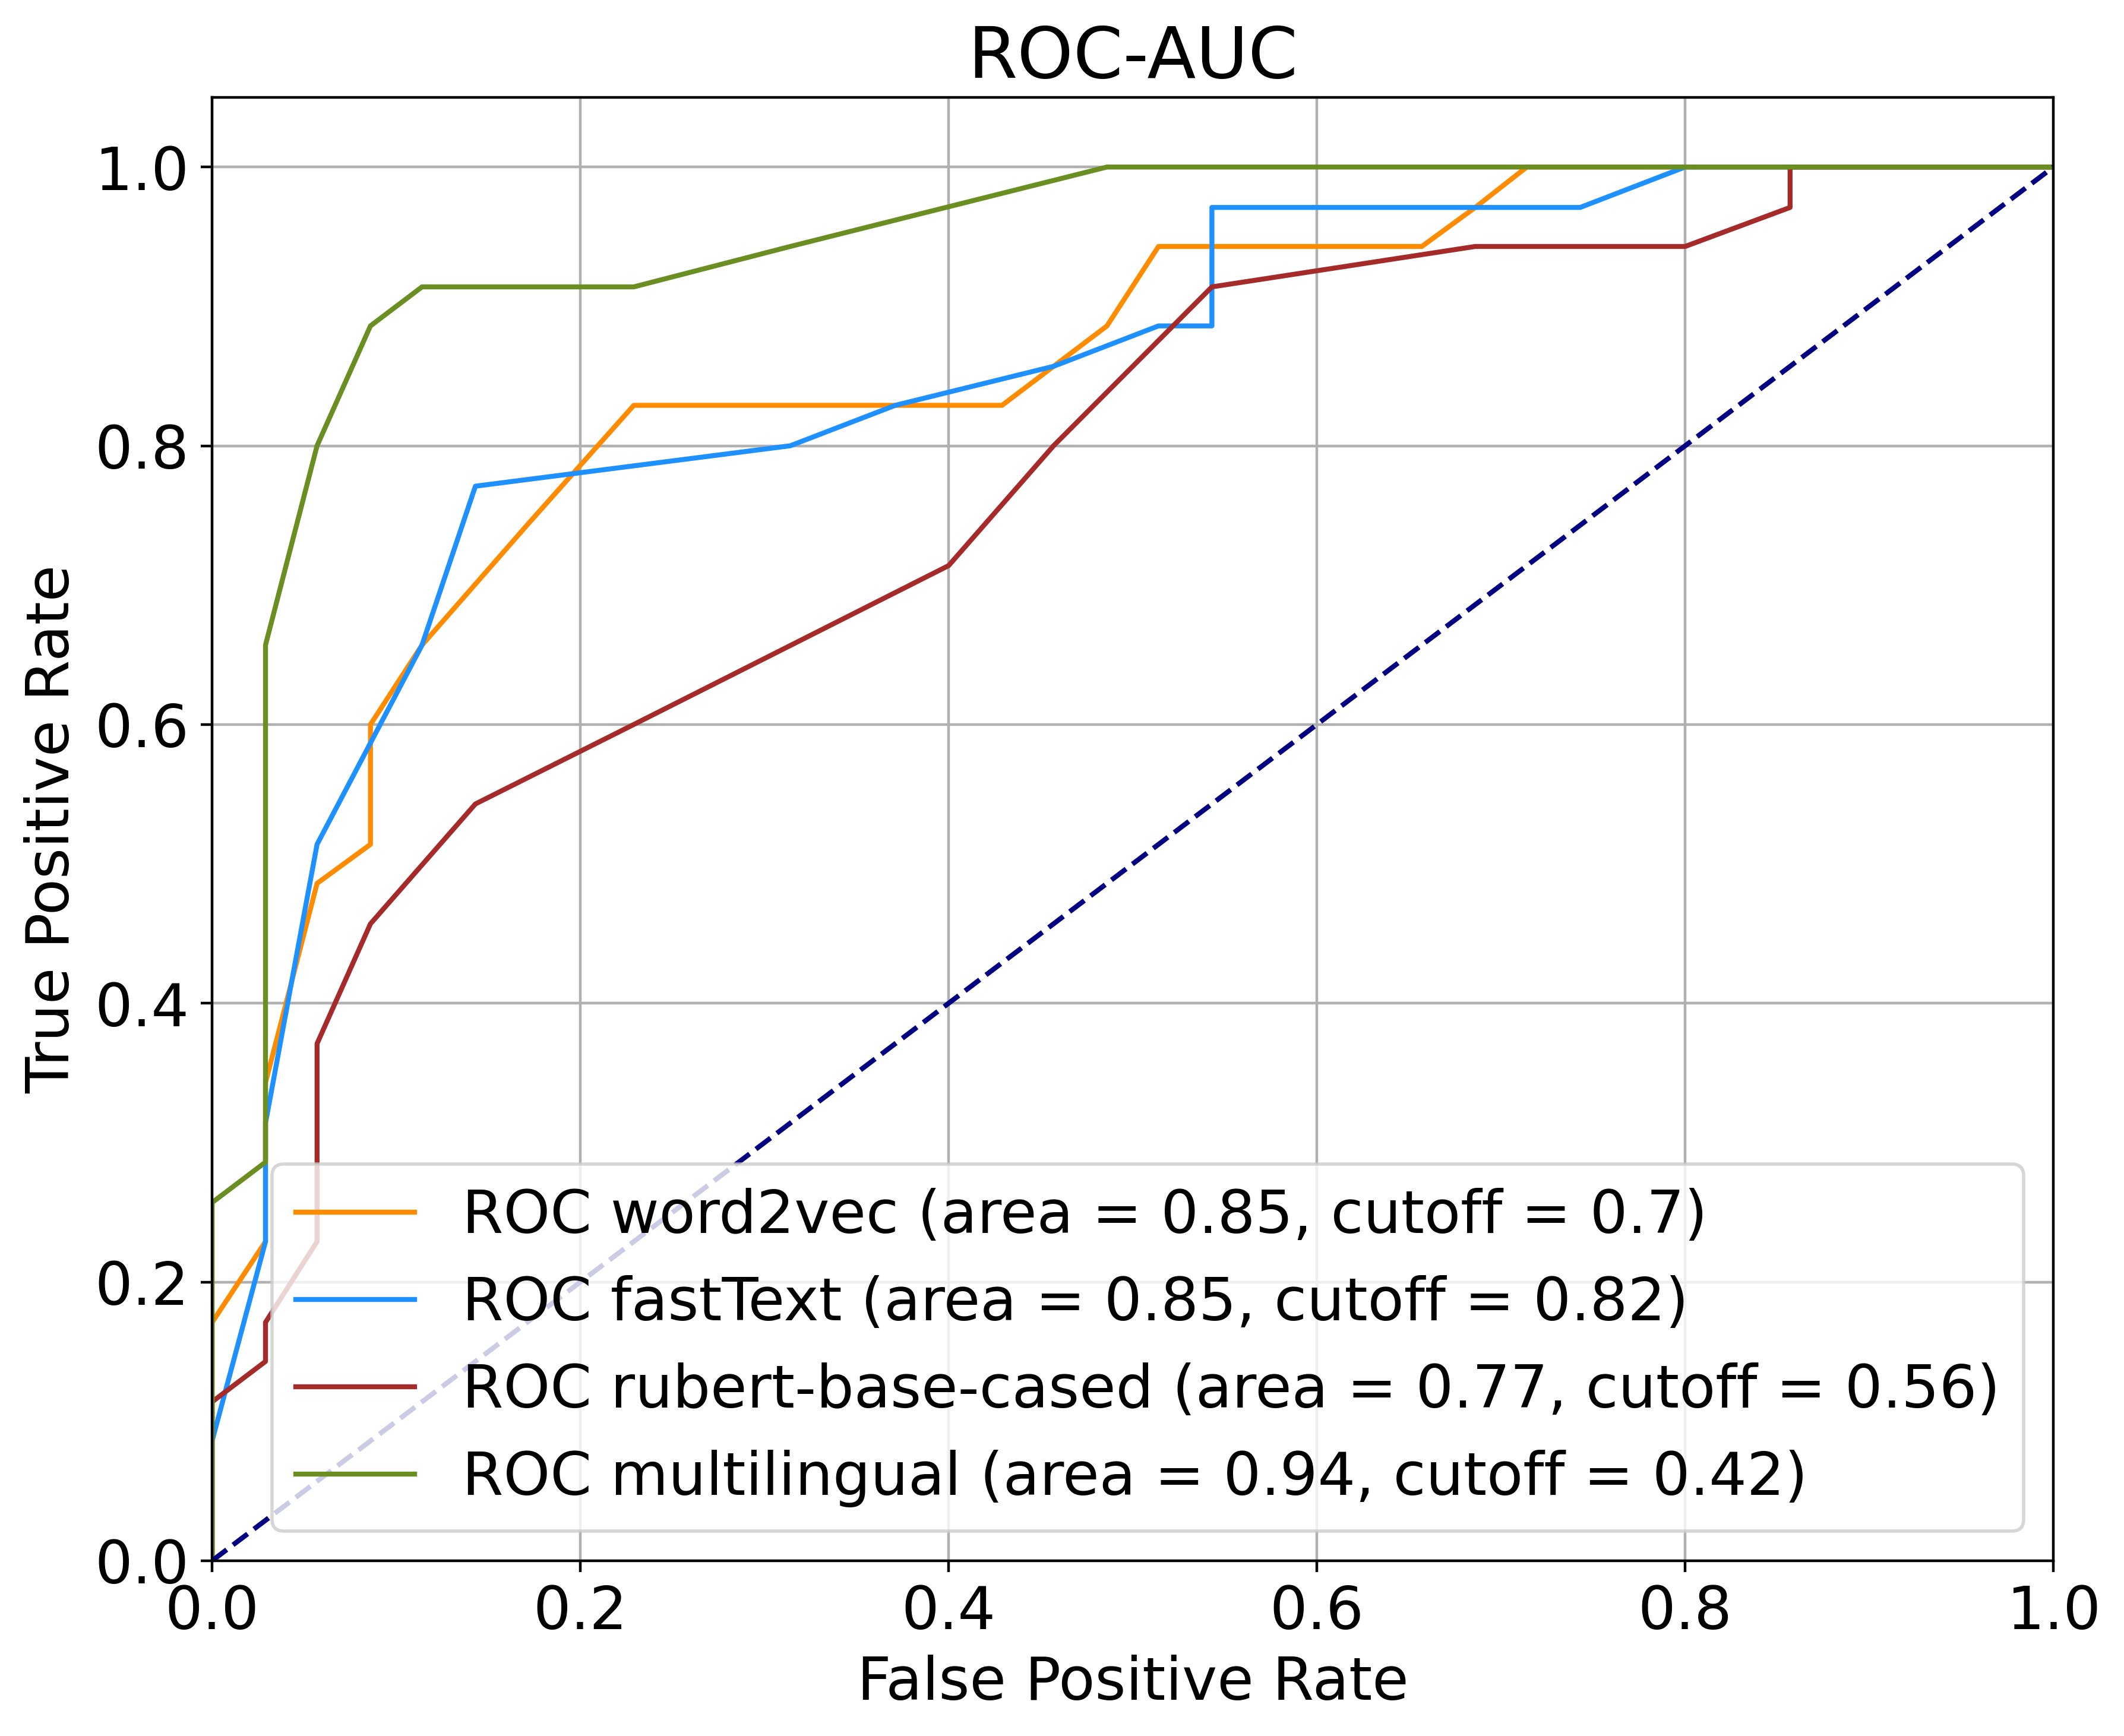

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
roc_auc_w2v = auc(fprs_w2v, tprs_w2v)
roc_auc_ft = auc(fprs_ft, tprs_ft)
roc_auc_deepPavlov = auc(fprs_deepPavlov, tprs_deepPavlov)
roc_auc_multilingual = auc(fprs_multilingual, tprs_multilingual)

fig = plt.figure(figsize=(10, 8))
plt.plot(fprs_w2v, tprs_w2v, color='darkorange',
         label=f'ROC word2vec (area = {round(roc_auc_w2v, 2)}, cutoff = {cutoff_w2v})')
plt.plot(fprs_ft, tprs_ft, color='dodgerblue',
         label=f'ROC fastText (area = {round(roc_auc_ft, 2)}, cutoff = {cutoff_ft})')
plt.plot(fprs_deepPavlov, tprs_deepPavlov, color='brown',
         label=f'ROC rubert-base-cased (area = {round(roc_auc_deepPavlov, 2)}, cutoff = {cutoff_deepPavlov})')

plt.plot(fprs_multilingual, tprs_multilingual, color='olivedrab',
         label=f'ROC multilingual (area = {round(roc_auc_multilingual, 2)}, cutoff = {cutoff_multilingual})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
fig.savefig("ROC-AUC.png")


In [56]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
# генерируем датасет на 2 класса
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# разделяем его на 2 выборки
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
# print(lr_probs)
# print(testy)
lr_auc = roc_auc_score(testy, lr_probs)
# print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f, cuto)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

[0.         0.         0.         0.00416667 0.00416667 0.00833333
 0.00833333 0.0125     0.0125     0.01666667 0.01666667 0.025
 0.025      0.02916667 0.02916667 0.0375     0.0375     0.04583333
 0.04583333 0.05416667 0.05416667 0.05833333 0.05833333 0.0625
 0.0625     0.06666667 0.06666667 0.07083333 0.07083333 0.075
 0.075      0.07916667 0.07916667 0.08333333 0.08333333 0.0875
 0.0875     0.09166667 0.09166667 0.09583333 0.09583333 0.10833333
 0.10833333 0.1125     0.1125     0.125      0.125      0.12916667
 0.12916667 0.13333333 0.13333333 0.1375     0.1375     0.14166667
 0.14166667 0.14583333 0.14583333 0.15       0.15       0.15416667
 0.15416667 0.15833333 0.15833333 0.16666667 0.16666667 0.175
 0.175      0.17916667 0.17916667 0.18333333 0.18333333 0.20416667
 0.20416667 0.20833333 0.20833333 0.21666667 0.21666667 0.2375
 0.2375     0.25416667 0.25416667 0.25833333 0.25833333 0.29583333
 0.29583333 0.3        0.3        0.30416667 0.30416667 0.3125
 0.3125     0.31666667 0.3

C:\Users\Andrey\AppData\Local\Temp\ipykernel_9268\1112255434.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
